In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


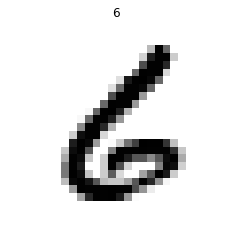

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

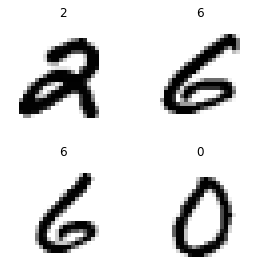

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [8]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [9]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [121]:
from models import Sequential
from layers import Linear, ReLU, Softmax, Tanh
from initializers import random_normal

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,)))
model.add(ReLU())
model.add(Linear(64))
model.add(ReLU())
model.add(Linear(10))
model.add(Softmax())

In [122]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy
from optimizers import SGD, RMSprop

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                optimizer=RMSprop(learning_rate=0.01, beta=0.9),
                metrics={"acc": categorical_accuracy})

model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot);

loss=2.313351	val_loss=2.305841	acc=0.103667	val_acc=0.113000


In [123]:
# train the model
model.train(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot, epochs=100);

Epoch 01	loss=0.226772	val_loss=0.301013	acc=0.933833	val_acc=0.914000
Epoch 02	loss=0.201451	val_loss=0.321432	acc=0.937833	val_acc=0.899000
Epoch 03	loss=0.184463	val_loss=0.403123	acc=0.952167	val_acc=0.918000
Epoch 04	loss=0.089528	val_loss=0.323376	acc=0.976167	val_acc=0.937000
Epoch 05	loss=0.104968	val_loss=0.421906	acc=0.975833	val_acc=0.936000
Epoch 06	loss=0.152970	val_loss=0.503897	acc=0.963667	val_acc=0.920000
Epoch 07	loss=0.155123	val_loss=0.430002	acc=0.958167	val_acc=0.917000
Epoch 08	loss=0.049132	val_loss=0.430382	acc=0.987000	val_acc=0.945000
Epoch 09	loss=0.049749	val_loss=0.609251	acc=0.986167	val_acc=0.949000
Epoch 10	loss=0.043083	val_loss=0.670414	acc=0.989667	val_acc=0.947000
Epoch 11	loss=0.089100	val_loss=0.768107	acc=0.985833	val_acc=0.936000
Epoch 12	loss=0.071623	val_loss=0.894018	acc=0.984500	val_acc=0.930000
Epoch 13	loss=0.097594	val_loss=0.856272	acc=0.985000	val_acc=0.937000
Epoch 14	loss=0.073892	val_loss=0.846174	acc=0.987000	val_acc=0.938000
Epoch 

/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/losses.py:47: RuntimeWarning: divide by zero encountered in log
  J =  -np.sum(Y_true * np.log(Y_pred)) / m
/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/losses.py:47: RuntimeWarning: invalid value encountered in multiply
  J =  -np.sum(Y_true * np.log(Y_pred)) / m


Epoch 17	loss=nan	val_loss=nan	acc=0.983167	val_acc=0.932000
Epoch 18	loss=0.120020	val_loss=1.038947	acc=0.984833	val_acc=0.939000
Epoch 19	loss=0.073967	val_loss=nan	acc=0.988000	val_acc=0.929000
Epoch 20	loss=nan	val_loss=nan	acc=0.988000	val_acc=0.940000


/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/losses.py:52: RuntimeWarning: invalid value encountered in true_divide
  dJ_dY_pred = -(Y_true / Y_pred) / m


Epoch 21	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 22	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 23	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 24	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 25	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 26	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 27	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 28	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 29	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 30	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 31	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 32	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 33	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 34	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 35	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 36	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
Epoch 37	loss=nan	val_lo

The model is overfitting the training set. Now let's see what regularization can do.

In [124]:
from regularizers import L2

# create the model
l2_model = Sequential()
l2_model.add(Linear(128, input_shape=(784,), kernel_regularizer=L2(0.1)))
l2_model.add(ReLU())
l2_model.add(Linear(64, kernel_regularizer=L2(0.1)))
l2_model.add(ReLU())
l2_model.add(Linear(10, kernel_regularizer=L2(0.1)))
l2_model.add(Softmax())

# prepare the model for training
l2_model.configure(loss=CategoricalCrossentropy(),
                   optimizer=RMSprop(learning_rate=0.01),
                   metrics={'acc': categorical_accuracy})

print(l2_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.333684	val_loss=2.327544	acc=0.098500	val_acc=0.089000
{'loss': 2.333683754184917, 'val_loss': 2.3275437000011223, 'acc': 0.0985, 'val_acc': 0.089}


In [125]:
# train the model
l2_model.train(X_train_normalized, y_train_one_hot,
               X_test_normalized,y_test_one_hot, epochs=100);

Epoch 01	loss=0.335580	val_loss=0.403492	acc=0.904500	val_acc=0.879000
Epoch 02	loss=0.365418	val_loss=0.396067	acc=0.882333	val_acc=0.874000
Epoch 03	loss=0.250117	val_loss=0.309785	acc=0.926000	val_acc=0.910000
Epoch 04	loss=0.423372	val_loss=0.495731	acc=0.861000	val_acc=0.854000
Epoch 05	loss=0.397015	val_loss=0.480556	acc=0.877333	val_acc=0.856000
Epoch 06	loss=0.321437	val_loss=0.390754	acc=0.900000	val_acc=0.873000
Epoch 07	loss=0.292961	val_loss=0.357495	acc=0.910667	val_acc=0.891000
Epoch 08	loss=0.256055	val_loss=0.308557	acc=0.922167	val_acc=0.914000
Epoch 09	loss=0.358673	val_loss=0.415636	acc=0.883000	val_acc=0.870000
Epoch 10	loss=0.307988	val_loss=0.404602	acc=0.902333	val_acc=0.876000
Epoch 11	loss=0.301505	val_loss=0.399446	acc=0.907667	val_acc=0.888000
Epoch 12	loss=0.337399	val_loss=0.392985	acc=0.890667	val_acc=0.871000
Epoch 13	loss=0.323850	val_loss=0.405236	acc=0.893167	val_acc=0.874000
Epoch 14	loss=0.245101	val_loss=0.321713	acc=0.927167	val_acc=0.902000
Epoch 

In [130]:
from layers import Dropout

# train a model with dropout
dropout_model = Sequential()
dropout_model.add(Linear(128, input_shape=(784,)))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(64))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(10))
dropout_model.add(Softmax())

# prepare the model for training
dropout_model.configure(loss=CategoricalCrossentropy(),
                        optimizer=RMSprop(learning_rate=0.01),
                        metrics={'acc': categorical_accuracy})

print(dropout_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.370860	val_loss=2.376781	acc=0.079667	val_acc=0.077000
{'loss': 2.370859894278254, 'val_loss': 2.3767813117849883, 'acc': 0.07966667, 'val_acc': 0.077}


In [131]:
# train the model
dropout_model.train(X_train_normalized, y_train_one_hot,
                    X_test_normalized,y_test_one_hot, epochs=100);

-4.163336342344337e-16
6.938893903907228e-18
13.21227423664823
0.5012893628711983
62.91401584911455
0.6731571416854814
-2.3314683517128287e-15
4.163336342344337e-17
136.43164252499412
1.5292139766076063
239.53577044706628
2.4308297247913213
-2.1649348980190553e-15
-8.326672684688674e-17
85.9095545766252
1.0480695340505466
124.97743404879138
1.1392358621310774
-1.5265566588595902e-15
-2.7755575615628914e-17
58.09918114846023
0.9210864762534423
124.67420570384321
1.0371117483102956
-1.97758476261356e-16
-6.938893903907228e-18
28.819805270320497
0.7176358625826055
36.15655166400868
0.43009373330554557
-1.3877787807814457e-16
-1.3877787807814457e-17
12.713473662238155
0.363435420178715
3.0634807265620596
0.01856654871546818
-1.3877787807814457e-17
2.0816681711721685e-17
11.135620500448496
0.1692983034213448
4.074640352799716
-0.007607781916369641
-3.400058012914542e-16
-6.938893903907228e-18
19.521100936606175
0.36993135903331986
42.794239360363896
0.3426838306558777
1.249000902703301e-16


-4.163336342344337e-17
3.98433914482581
0.14039172705449562
22.17857920032099
0.21085923758857647
5.065392549852277e-16
0.0
1.8583088606565865
0.1303907421440985
5.327099281489595
0.026888016629019726
-9.43689570931383e-16
-2.7755575615628914e-17
3.5801344981876073
0.14666269279241617
31.16218273913744
0.2633500594707878
4.198030811863873e-16
0.0
1.4056888010923787
0.14923747169593357
-15.509909732857132
-0.15189597551147305
-4.163336342344337e-16
2.7755575615628914e-17
-0.9519804405315031
-0.0557162972170442
-0.5681349916427255
-0.0036915915185479764
3.400058012914542e-16
-1.734723475976807e-17
0.47117435011246434
0.07708449379088927
3.0471200253150608
0.061115064230687084
-9.71445146547012e-16
-7.632783294297951e-17
5.237191634777457
0.2434823354534415
26.088090280358838
0.25874089532418915
-1.9567680809018384e-15
-5.377642775528102e-17
-0.06416197320897304
0.0310215374826123
-7.22765622231118
-0.06900384835298277
-8.743006318923108e-16
-9.71445146547012e-17
7.679513173814708
0.26512

0.01640887309072385
5.273559366969494e-16
1.9081958235744878e-17
1.0487536046623993
-0.021955492868251547
-0.268876518444779
0.041347148872392596
-1.429412144204889e-15
-2.6020852139652106e-17
1.989591774591098
0.30468705520540756
22.879669606118878
0.19814497837673278
-3.7470027081099033e-16
4.2500725161431774e-17
9.1785511889965
0.31960526569989395
29.29405434761282
0.3241657825554219
-1.2836953722228372e-16
-2.42861286636753e-17
1.2959899011279892
0.06451938028438783
-6.379879738964253
-0.08637780106155228
1.8197249262996706e-15
6.938893903907228e-18
-1.9416922835808919
-0.16756540876520898
0.554195704602031
-0.034550778345999816
1.0130785099704553e-15
4.85722573273506e-17
1.1232425068280976
0.1325429780685253
-17.41773167538349
-0.11141050316104037
-3.2751579226442118e-15
-3.122502256758253e-17
5.804224910932923
0.1759588096129569
22.789450787966548
0.2017073451037518
-8.708311849403572e-16
-4.163336342344337e-17
8.96563342837131
0.36679015921047736
17.871084336902832
0.30125257918

0.18132010487782643
1.5681900222830336e-15
0.0
4.978049865124724
0.40761076472778446
7.905178537406776
0.12090969889327254
-1.4155343563970746e-15
-3.642919299551295e-17
6.728618586026216
0.22444848692933753
27.582060473898913
0.28476007502622314
-2.456368441983159e-15
-6.245004513516506e-17
5.575063093228716
0.16521415052738408
25.829381208725295
0.2598601191322284
2.636779683484747e-16
1.3877787807814457e-17
-0.24865707130925963
0.007086680621105637
-12.333328981560614
-0.11221657702629892
-1.3877787807814457e-17
-6.938893903907228e-18
2.9478741508177055
0.18302522004614966
2.1547414497259543
-0.01554872588611491
1.1032841307212493e-15
0.0
-2.737730656961176
-0.11093412859903828
-0.6990993542066564
-0.005155912208070915
-1.4641066137244252e-15
-6.071532165918825e-17
4.231629534679809
0.2334041721030054
11.828234918828974
0.14377813848036525
2.01574867908505e-15
4.5102810375396984e-17
0.05477968404494038
0.01893919968178525
-10.471860919630133
-0.09674672896041189
-2.0261570199409107e

3.937822290467352e-16
1.3877787807814457e-17
-0.21728696034635958
-0.01820574080768437
-2.368689015168981
-0.04049027761836357
2.983724378680108e-16
2.7755575615628914e-17
0.11638076307663248
-0.04088968797387859
11.588240486013799
0.06695888368598144
1.457167719820518e-15
-6.938893903907228e-18
4.435440039937018
0.1553468744336251
24.030523785779575
0.2527293987392407
3.365363543395006e-16
6.938893903907228e-18
-0.7595103904691234
-0.005154873963254952
-0.48124224658692766
-0.03337118250190772
3.3306690738754696e-16
1.734723475976807e-17
7.574244133874576
0.3505984183324715
12.326548679079856
0.19934000526133508
7.771561172376096e-16
2.7755575615628914e-17
3.651279979396043
0.25151817837768187
28.101698835421903
0.21702101288735987
1.609823385706477e-15
1.3877787807814457e-17
10.644270142493262
0.38614012216088794
32.59713338517202
0.35561095463961023
-1.700029006457271e-16
3.469446951953614e-18
1.6739952185684706
0.0975759092906652
-2.2264698239405907
-0.016643610295028123
4.33680868

2.4488810605156655
0.07872523367057332
8.905962585314635
0.05128169843252256
6.869504964868156e-16
-6.245004513516506e-17
9.617598339617993
0.41399574802857897
11.995709253617655
0.1770080845607684
1.186550857568136e-15
0.0
0.4057085438176167
0.09643470195041734
2.898233204769596
-0.004613852458665704
-7.4593109467002705e-16
-6.938893903907228e-18
1.6636244362870696
0.05691639249053293
17.11691426045043
0.1102795549357644
-5.342948306008566e-16
1.3877787807814457e-17
1.182356132730718
0.04491904031822924
3.3909044673560365
0.03843508752786877
-2.157996004115148e-15
-4.85722573273506e-17
1.137133886480032
-0.06984320509182004
4.75017574544071
-0.0005628285716011705
3.497202527569243e-15
2.0816681711721685e-17
-1.1418030064940488
-0.14627197752945398
-19.968264959081036
-0.2996330784444161
1.1657341758564144e-15
0.0
0.8714681988518295
-0.07000696796885425
4.414254573464249
0.022798921012926937
2.1510571102112408e-16
2.7755575615628914e-17
7.015889003697271
0.32089793207311745
24.23519965

-1.6479873021779667e-17
-2.2202719466641234
-0.2513001337293878
-11.198516515562993
-0.12690687575736775
1.1102230246251565e-16
-2.42861286636753e-17
7.109103788194583
0.10379976347616063
13.650312788282893
0.18958127832678182
1.1796119636642288e-15
-6.938893903907228e-18
2.2406360305369737
0.24804984208911254
15.57319030188429
0.15537172474191752
-1.2975731600306517e-15
-6.245004513516506e-17
8.858616273314261
0.40625350808292887
49.22443960269819
0.4451651380933091
1.2975731600306517e-15
1.734723475976807e-17
1.6833655729207226
0.028968007153036907
-5.734972422372958
-0.05547939890377763
7.632783294297951e-17
-2.42861286636753e-17
6.502285641236917
0.3536877806656106
18.96417747474329
0.34185048753563724
-1.4849232954361469e-15
-8.326672684688674e-17
5.9661758188721095
0.1712594144119835
2.8982001039808387
0.09014209225991276
-5.551115123125783e-17
-1.3877787807814457e-17
1.4261626174794992
0.030577223739596666
4.025413162233387
0.029940580111584326
1.5404344466674047e-15
-1.04083408

14.489947952202105
0.1313629872113359
1.186550857568136e-15
-2.0816681711721685e-17
-1.1467817729522287
-0.1474226413666475
-6.869251609295073
-0.030415578188696082
2.3939183968479938e-15
1.3877787807814457e-17
-1.783067022969615
-0.05053082508870177
-12.251250602416794
-0.13349273933398784
1.5404344466674047e-15
3.122502256758253e-17
-0.25194535549064956
-0.04244344179764789
2.6337984967838595
0.02331112611564591
-6.938893903907228e-16
-3.642919299551295e-17
7.516374695788718
0.2909432129874633
32.07692724242582
0.2260288259616424
8.482797797526587e-16
-1.0408340855860843e-17
-2.3421167521381125
-0.23760261995136006
-11.202834189682157
-0.15528991103965717
-1.1466522176206695e-15
-5.204170427930421e-17
0.908557872902902
-0.0858150668967828
-18.136233918851637
-0.20662982632263122
9.71445146547012e-17
-2.233456475320139e-17
2.53380411111036
0.23720891953726442
13.433845148613685
0.2750394023560716
7.4593109467002705e-16
6.938893903907228e-18
-0.9164926244408389
-0.040462552132070895
-3

12.726660686794753
0.1524952085611822
3.2612801348363973e-15
3.2959746043559335e-17
9.117671909981029
0.7084311773898897
5.102063092592922
0.07611123716031987
-1.0408340855860843e-16
-2.7755575615628914e-17
-0.10748598279292909
0.11831273083017183
-1.5352944001497053
-0.0446422937015034
2.3505503099485736e-15
1.3877787807814457e-17
0.8205561290204569
0.10608051812517036
23.223981018821444
0.32566614382498926
8.916478666520788e-16
6.938893903907228e-18
3.5402653412078133
0.4723605088601456
13.40349868806886
0.039079949124440086
7.632783294297951e-17
-2.7755575615628914e-17
1.2194211751006878
0.11999916013485852
8.537382626450283
0.049276310299155725
4.145989107584569e-16
-1.3877787807814457e-17
-0.25179208074361503
0.01260266548528223
-6.146860625010189
-0.06627808589709087
-2.3037127760972e-15
-2.0816681711721685e-17
7.1895290785824235
0.3629026435611691
17.71255268746769
0.10095481834924919
1.7277845820728999e-15
1.0408340855860843e-17
-0.5461220029947975
-0.06479187235768857
-7.17259

Epoch 04	loss=0.243218	val_loss=0.328791	acc=0.938500	val_acc=0.915000
-3.677613769070831e-16
-2.0816681711721685e-17
1.8670727397191165
0.02969683713560898
11.128607252772767
0.0939960270949156
5.134781488891349e-16
6.938893903907228e-18
3.6336680889279536
0.12708579407100096
37.68407960175563
0.2694403430538476
-1.2351231148954867e-15
3.469446951953614e-18
1.7558433001265148
0.13139577138697583
13.06433640230017
0.10710906729186952
-4.371503159461554e-16
-3.0357660829594124e-18
2.444098390660398
0.11410836922321028
10.23581107710594
0.1409743201237839
-1.6237011735142914e-15
-1.734723475976807e-17
8.875456661583002
0.5546167946871388
1.4990280310946889
-0.03435136576842715
5.204170427930421e-16
0.0
-0.02623164478660972
-0.0377262488025409
-3.3469940179559208
-0.044310451205604895
-1.078998002057574e-15
-4.5102810375396984e-17
-0.026091512506563053
-0.03398178420798405
0.7643999814214152
0.03998258641548437
2.2898349882893854e-16
-1.6479873021779667e-17
2.028388119509913
0.04040152637

-11.924234338022101
-0.096855011011171
2.6038199374411874e-15
1.3877787807814457e-17
1.1934117052751678
-0.03812182687436061
11.12667705956566
0.10675003204440417
-3.0531133177191805e-16
5.204170427930421e-18
2.5196457979183693
0.15110207512006904
18.485649779845374
0.11330136276190902
6.106226635438361e-16
-5.637851296924623e-18
-0.809754692851871
0.004562999624440733
-8.62484493245215
-0.05139971973877471
3.0531133177191805e-16
-3.122502256758253e-17
4.967793151829149
0.13449182218324654
9.326539939070347
0.1806516883162139
-2.706168622523819e-15
-3.469446951953614e-17
0.5609759229160947
0.058687057783093105
-3.4694152194963426
-0.033219469802604346
-5.551115123125783e-17
0.0
11.43826331738577
0.4604846570223452
19.78066205838249
0.15177538914459626
1.2455314557513475e-15
-1.3877787807814457e-17
3.978501402831873
0.11072474002131824
7.485580405636283
0.05174404197226004
1.4155343563970746e-15
0.0
2.114452326085635
0.15543090174102708
6.328979253895058
0.06661102710289474
-5.932754287

3.5388358909926865e-16
-3.469446951953614e-18
-8.562009984052462
-0.39859447289050043
-47.61163264199813
-0.45201061648788204
1.4988010832439613e-15
3.469446951953614e-18
1.5847193837276574
0.09611280587219001
-1.1552132233998917
-0.008000626596179145
1.1293049828609014e-15
1.214306433183765e-17
0.03081393315487202
0.06797153403594136
2.903157034497605
-0.010238917644818442
-4.440892098500626e-16
-1.474514954580286e-17
0.6819067097176443
-0.026084764007075194
8.266836426300136
0.0978171931745667
4.0245584642661925e-16
2.7755575615628914e-17
7.730659886714239
0.5916394975606196
72.99074922766931
0.7758596907593438
4.440892098500626e-16
-3.642919299551295e-17
10.375570891513568
0.367364050541321
81.66532210010995
0.7277757925493109
9.26342336171615e-16
3.469446951953614e-18
4.011755607299191
0.0965995231229258
7.065741413430642
0.07311140954590578
-1.942890293094024e-16
-6.938893903907228e-18
-2.0957236435185322
-0.06292674309734565
-2.6249010412701494
-0.0060189655493248576
1.6792123247

7.337880303381894e-16
1.3877787807814457e-17
6.011862598167108
0.313299212679429
2.963462661754572
-0.008003544202640628
-7.077671781985373e-16
-3.0357660829594124e-17
4.41992062780711
0.22882082565085546
17.502666651325097
0.10418893774605714
-1.5681900222830336e-15
-2.0816681711721685e-17
-0.04578551828200911
-0.06181568389319739
-10.568802430674216
-0.11838273945203408
-9.228728892196614e-16
-2.949029909160572e-17
0.2943569747752259
0.017062546961224404
-1.9404600507651555
-0.015715057941390755
1.6063539387545234e-15
1.3877787807814457e-17
3.14803985316477
0.1388210516751916
7.659803730832913
0.09383437193708433
4.510281037539698e-16
3.0140820395097023e-17
1.3587982303747426
0.22821987522217163
8.2837514421531
0.14380071017746776
-6.591949208711867e-17
-4.163336342344337e-17
8.35765828430373
0.26522135496401017
38.59535179188767
0.3650048371404902
8.604228440844963e-16
4.163336342344337e-17
0.5562929975983348
0.06717025067508697
4.660070309697152
0.07773173616337944
2.11636264069170

0.5666260533990666
0.06553053269963405
-1.8785179138597001
0.08511159961300563
3.12944115066216e-15
0.0
5.145016113791075
0.3107942200668415
11.116679961368318
0.11330606556114792
-1.2698175844150228e-15
-1.3877787807814457e-17
3.1713727188760776
0.1610244494872094
24.119181633333234
0.19959448594496187
-6.036837696399289e-16
3.2959746043559335e-17
0.6898043116721515
0.05808528860799343
18.64632960216291
0.13994359044779914
-2.0556473190325164e-15
-3.469446951953614e-17
-1.0042844816674745
-0.14858148578470623
-10.58812785300193
-0.12938807767198596
1.6670692604137116e-15
4.163336342344337e-17
-0.7606557970055745
-0.1012365791775787
-8.322658954215637
-0.15034381248840184
-1.304512053934559e-15
-2.7755575615628914e-17
1.9783203790028858
0.026754420946798127
7.216118615478934
0.10199049645450103
-1.5959455978986625e-15
-3.122502256758253e-17
10.106776608077684
0.5282665202669132
59.85989612335373
0.468197519723517
-6.739400704169896e-16
-3.469446951953614e-17
-0.8385131660266791
-0.1755

37.47298426186819
0.28229720371357464
-2.699229728619912e-15
-2.0816681711721685e-17
2.6942178059221433
0.19451207968531167
38.155256801330815
0.38546330535495665
-2.42861286636753e-17
1.0408340855860843e-17
-0.9045764191109449
-0.0707038303951527
-14.950120282951314
-0.1774887426128869
2.609024107869118e-15
1.734723475976807e-17
-0.03639517551348931
0.020934742758584497
-0.8602965676903965
-0.058858959989892504
1.9984014443252818e-15
1.1275702593849246e-17
-1.3686622235158392
-0.15085655384551566
-9.327931032547937
-0.10711022106059878
9.08995101411847e-16
-1.0408340855860843e-17
8.631690628576965
0.3359822461740495
36.766807788741204
0.6045496964565154
-9.575673587391975e-16
-3.469446951953614e-18
5.276956334720824
0.2187392737372913
15.118255044062286
0.1415740275806248
-2.078198724220215e-15
-3.469446951953614e-17
0.5399171759410151
-0.04732844614582657
2.791162454964931
0.013247875862789749
-3.58046925441613e-15
-1.3227266504323154e-17
2.641885406342943
-0.00037626628296689654
-19

2.831068712794149e-15
2.42861286636753e-17
22.128043903079394
0.9424340785842774
59.55795377251919
0.8572768304012752
3.247402347028583e-15
4.5102810375396984e-17
11.34713844164596
0.7163767445391257
62.149990716138696
0.6629663390499565
2.067790383364354e-15
4.163336342344337e-17
7.531282436321822
0.4024507344695734
16.27814396020713
0.24338602020143568
-7.892991815694472e-16
-3.8163916471489756e-17
0.5737004222098043
-0.17632231773249668
-12.13341707312526
-0.1515277313683854
-1.5126788710517758e-15
-2.7755575615628914e-17
17.351008969425195
0.4165819185146852
40.80039769897232
0.37994865869240896
4.597017211338539e-16
-1.734723475976807e-17
0.20079598339535698
0.055875057552963035
0.7448181904754961
0.006409268994761607
1.4259426972529354e-15
0.0
-1.0643605168002217
-0.21667685111653368
-15.538828352688562
-0.17824841025988006
2.1441182163073336e-15
-1.2902005852577503e-17
2.4875976770412627
0.012040481284392765
-4.3796604710215465
-0.04730477623075538
-9.593020822151743e-16
-2.1684

1.0443035325380379e-15
-1.3877787807814457e-17
0.719874858087464
0.024512783006648532
-15.257489113866834
-0.1354344928859471
2.375432749807116e-15
3.469446951953614e-18
1.0065130813286751
0.12628409360365814
1.6450303601432694
0.010447664965726328
-1.205632815803881e-16
-1.3877787807814457e-17
-0.8065084987026907
-0.08877567301840128
-20.97627241665742
-0.1962951617783162
2.8033131371785203e-15
2.6020852139652106e-17
9.939665391129378
0.2660564947799159
30.3789705739753
0.3733608995746026
3.462508058049707e-15
7.632783294297951e-17
2.3604968042799896
0.4322428378306215
29.971724553700792
0.42663986834533063
-1.5994150448506161e-15
-2.7755575615628914e-17
0.6144545170370399
-0.10379358068523142
-17.054862180737313
-0.22262425769494448
3.2959746043559335e-15
4.336808689942018e-18
0.9102634973167827
0.061657144268958505
11.70382168418744
0.05157750876538644
-2.5777990853015353e-15
-3.8163916471489756e-17
2.0652210999899316
0.2339647898927796
7.967343047797498
0.09569197436712239
-1.90819

0.14533264107448848
-1.4710455076283324e-15
-1.9081958235744878e-17
2.4603649748850778
0.11890339320111591
11.068260790165521
0.16488229907351995
6.938893903907228e-16
-3.469446951953614e-18
7.365297460301653
0.3569423874426234
85.43382852977903
0.7484845026718228
-1.8665624601510444e-15
-1.3877787807814457e-17
1.259651151904747
-0.012489911124327138
-1.1752794118390848
-0.018076303621133744
-2.42861286636753e-17
-2.7755575615628914e-17
9.686736508744286
0.7099654012832834
69.52057288814025
0.6036497769467144
6.591949208711867e-17
-1.734723475976807e-17
0.39860543293903006
-0.04158368615091421
-8.133681311849074
-0.06901759158083054
-5.93275428784068e-16
-6.938893903907228e-18
2.7854279420918138
0.2953260846262339
17.670935688362665
0.10966370025868495
1.1726730697603216e-15
-3.469446951953614e-18
8.763588651193338
0.3318678536026862
2.997548056180247
0.023478972764353276
-6.765421556309548e-17
-1.3877787807814457e-17
1.766458433889496
0.11714226695341443
9.743146136238657
0.0743490135

4.03551990345892
0.06624101714868974
-2.7755575615628914e-16
-6.938893903907228e-18
1.5620471301579504
-0.014463789602752436
23.31959254753255
0.18078304857753857
-1.0061396160665481e-15
-1.9081958235744878e-17
-1.4700165457915104
-0.12018225059568383
-11.049306385874507
-0.08193290027823692
3.469446951953614e-16
-6.938893903907228e-18
6.533533840305745
0.27705811933019203
59.577016681756916
0.3691117631276407
Epoch 08	loss=0.247480	val_loss=0.441150	acc=0.941000	val_acc=0.916000
3.400058012914542e-16
-1.3877787807814457e-17
0.11797385363262347
0.0014189876207634788
14.205669063166498
0.14117013991734775
1.7694179454963432e-16
2.42861286636753e-17
11.008878361017567
0.40783600025996547
3.78365041598235
-0.0445584674942264
4.701100619897147e-16
-3.469446951953614e-18
0.9402514158310711
0.1369870998259337
1.6886253401654896
0.0399548652803039
1.4085954624931674e-15
2.0816681711721685e-17
0.46420358975958165
0.08538910632538503
0.5216563824424449
-0.02480979581731496
7.433290094560618e-16

-7.28583859910259e-16
-7.914675859144182e-18
-0.2293814247036704
0.13626939759449624
11.520273889805326
0.2169601200934229
-5.620504062164855e-16
-1.9949319973733282e-17
-0.2425354086144647
-0.07845961247425945
-12.406029418355693
-0.06390144529277442
2.373101715136272e-15
3.122502256758253e-17
0.7169387792347515
-0.0505538663270681
-18.116731810208947
-0.1553555352753005
1.915134717478395e-15
-2.7755575615628914e-17
4.402170651758301
0.4958941775655219
21.270231511865816
0.11478768641552087
-1.1622647289044608e-16
-2.7755575615628914e-17
-0.6670115420840377
-0.10985489482699606
-2.3180291545735456
-0.20500210717159892
-7.771561172376096e-16
-6.938893903907228e-18
2.3045372939817526
0.05459165377560372
4.928906664300363
0.06377079351878066
-1.3183898417423734e-16
6.938893903907228e-18
-1.4739503010647104
-0.15658095950154388
-11.76399802280313
-0.11802671699572825
3.157196726277789e-16
-4.336808689942018e-17
2.8046244775696803
0.24324535870158337
18.22265674709083
0.19618294105847278
-

5.759281940243e-16
1.3877787807814457e-17
4.924093768194213
0.40864931275170124
19.06728675470834
0.2547277194224329
1.8735013540549517e-16
-1.3877787807814457e-17
3.7760809038938623
0.33575928784513975
28.550355758627273
0.384808442183756
8.326672684688674e-17
-3.469446951953614e-18
-1.3551136580370504
-0.15526089863687398
-6.147867555743553
-0.10742171105130649
4.996003610813204e-16
3.469446951953614e-18
10.445360619895979
0.19755269585353513
30.647124842704088
0.28261639009301903
9.298117831235686e-16
-3.469446951953614e-18
1.3142934377739033
0.060453532272810584
-4.467024702844576
-0.05513285463523388
7.875644580934704e-16
-4.163336342344337e-17
1.9258672421098688
0.07628659911167596
-1.1226188712568386
-0.009355905838832161
-4.518954654919582e-16
3.469446951953614e-18
0.15443001084479288
-0.038653604907322295
1.8071035645051872
0.005868062749172856
-1.4988010832439613e-15
0.0
2.469866997616357
0.3030844027039007
30.56104376346165
0.40632624678553675
3.634245682171411e-16
6.9388939

32.420956560650055
0.31152113739898374
2.299375967407258e-15
2.992397996059992e-17
-1.0432888792032382
0.021708493256032524
-0.39580089730225826
0.0065729586631014525
2.7356589216154248e-15
1.214306433183765e-17
0.32153527960727496
0.027981325180745448
-2.114745176509947
-0.009096864976410008
-1.9532986339498848e-15
-8.673617379884035e-18
-0.6802972189552215
-0.09216483674647619
-0.912114398408822
0.010407472663629454
-5.204170427930421e-18
-1.734723475976807e-18
-0.2804001473002863
-0.052046584522311305
-3.447178373828115
-0.03706573326035327
-2.033095913844818e-15
-6.938893903907228e-18
4.269716474073444
0.07559549626289083
40.57102631238551
0.4245493870491606
-4.85722573273506e-17
-6.938893903907228e-18
-0.5695096512813093
-0.06289644454329585
-10.636473758794628
-0.11909453009064994
2.220446049250313e-16
3.8163916471489756e-17
4.0105361693304635
0.140429565848457
31.02199966973756
0.22940737983668913
5.572799166575493e-16
1.0408340855860843e-17
-0.2170877689549441
-0.00708434033814

-2.9321201140975797
-0.13868261873972731
54.38673259855325
0.46432514982027173
5.282232984349378e-16
-5.551115123125783e-17
0.44029503339051657
0.022231415690015285
6.000055009263886
0.07853276916814214
4.4114017994090204e-15
3.469446951953614e-17
7.9718439899456905
0.1764517419081469
24.681046254184746
0.20287085716587147
-2.1250362580715887e-15
-4.5102810375396984e-17
7.104048663527095
0.38676201437764257
44.68338699606931
0.27189113130310455
1.2537713922622373e-15
-6.938893903907228e-18
-1.2147747519620684
-0.20152117999080038
-19.401351173330525
-0.21292968273829913
-4.891920202254596e-16
8.673617379884035e-18
-0.019393211692342094
-0.17988579030140073
-12.09004851727982
-0.0723432695159025
-5.93275428784068e-16
-8.673617379884035e-18
3.4430648290672585
0.2768482010169915
60.39933621226442
0.49721485192814385
-4.440892098500626e-16
-2.7755575615628914e-17
8.53958845251562
0.5644362815462479
49.783249893548295
0.4041970583886241
6.522560269672795e-16
-1.734723475976807e-17
0.1519810

8.1697730750662
0.11611068060895346
10.819727014100215
0.04663671308777466
1.54303653188137e-15
1.3877787807814457e-17
-0.2703176401613743
-0.019064861226409387
-1.3799871591483213
-0.015900330792408233
2.441623292437356e-16
-1.3877787807814457e-17
5.697206986099471
0.4653759280702427
40.33471125197635
0.3547708274890172
3.7990444123892075e-15
5.204170427930421e-17
1.520045928549283
0.16376311115013303
-2.1570213225354333
-0.011892442407505144
5.342948306008566e-16
2.0816681711721685e-17
-0.9765547562306753
-0.0621531236489775
-25.356213911193684
-0.2325658404439208
2.220446049250313e-16
-6.938893903907228e-18
27.88967925990413
0.6053726197321931
85.44922571054403
1.4855476769029088
-1.3530843112619095e-15
-2.0816681711721685e-17
1.6544568386366907
-0.02455790942616129
30.345678845170646
0.2460256777479794
2.0816681711721685e-16
-2.7755575615628914e-17
0.7229096294655387
0.049276600276085034
13.051943464828929
0.09317965270070987
-1.887379141862766e-15
-2.7755575615628914e-17
15.905271

-0.38459156214522483
0.03547489347186663
-9.879420555737926
-0.08440018786660668
-5.412337245047638e-16
1.734723475976807e-18
12.228800967905082
0.264566400123048
62.432461576775324
0.5720341343511984
-6.106226635438361e-16
-2.0816681711721685e-17
4.286993067571677
0.13880944070381274
20.084994533353072
0.13033687752016546
-5.204170427930421e-17
2.0816681711721685e-17
0.39210338875860384
0.0690822600867928
8.887445555754356
-0.0011784785623486227
8.083811398051921e-16
-6.938893903907228e-18
0.3564016250790765
-0.005927803523885319
-2.996288064087866
-0.06856596444307078
2.2924370735033506e-15
3.122502256758253e-17
-0.40403933658483243
-0.04638449464263405
-8.129360787428272
-0.09585356222867242
1.8735013540549517e-15
3.122502256758253e-17
17.668142587940594
0.4212566297547875
77.06082015672679
0.8688771137109412
-2.42861286636753e-15
-2.7755575615628914e-17
2.106508511314444
0.08532043317451117
45.467095008546266
0.3290032882194469
2.0122792321330962e-15
0.0
4.893552226408707
0.2373400

-33.088184123924165
-0.4292052783551962
-1.205632815803881e-16
0.0
1.8304806599105499
0.09603341068348252
6.905809782196265
0.07436906040586744
1.2697904793607107e-15
9.168284621080547e-18
-0.58222022062051
-0.08066868860882045
-6.427246393863997
-0.05916988851698125
1.339206523454095e-15
6.938893903907228e-18
2.3873312565584905
0.18740288552463025
10.1512586824328
0.07411162338074545
3.6463887465032485e-15
2.596664203102783e-17
0.30897061050853664
-0.04410315778067224
-9.977475771570399
-0.08135296484456254
1.8735013540549517e-15
0.0
-1.9957340664267675
-0.1562293711023641
4.816808335257865
0.01119224992111446
-1.0009354456386177e-15
-3.469446951953614e-18
9.347939605386493
0.36805179669767735
74.89191951398531
1.0547048863840347
-3.122502256758253e-16
-1.3877787807814457e-17
0.2798896466569102
-0.03974290480078003
2.354098670104969
0.06515720936728128
1.817990202823694e-15
-3.469446951953614e-18
2.805212594216579
0.14909364184262253
22.218765866674623
0.12550047107235
2.5413698923060

-17.488331928937512
-0.17587152969183953
3.0184188481996443e-16
1.8214596497756474e-17
3.050786006722811
0.14358507402989984
20.71759955161438
0.18625551736743837
7.810372222019288e-16
-1.474514954580286e-17
-2.8839613451079886
-0.1826557573855591
-16.87909593711889
-0.18135621124495488
-2.755608241589158e-15
-2.0816681711721685e-17
-1.1622910033822482
-0.13621397679950303
-15.905140969614447
-0.1879908107789808
3.5388358909926865e-16
0.0
0.49195564090772814
0.003164042851428149
11.475181553224193
0.10740544260900425
-2.2620794126737565e-15
-2.7755575615628914e-17
18.577081934435135
0.47971487771811566
95.5144484033409
0.7871761762345068
1.3665284182007298e-15
8.673617379884035e-18
-0.3040062759879595
-0.019511507471758477
-3.0612129505709724
-0.03396481617609939
-1.1657341758564144e-15
-1.734723475976807e-17
4.653399462008818
0.12986948999490666
7.568052306215885
0.09324803527343926
1.8665624601510444e-15
5.204170427930421e-17
4.443929765874351
0.1872089133777272
30.960091282707374
0.

/home/moaz/Learn/AI/Machine Learning 2020/Deep Learning From Scratch/losses.py:52: RuntimeWarning: invalid value encountered in true_divide
  dJ_dY_pred = -(Y_true / Y_pred) / m



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Epoch 18	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Epoch 20	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Epoch 22

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Epoch 33	loss=nan	val_loss=nan	acc=0.098000	val_acc=0.103000
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

KeyboardInterrupt: 

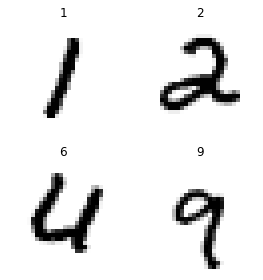

In [23]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

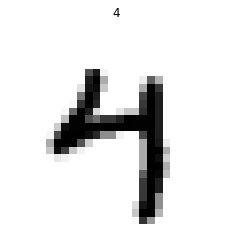

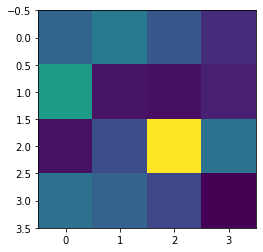

In [24]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()